### **CC57 - MACHINE LEARNING - CLASIFICADOR NAIVE BAYES**

# Detección de fraude con tarjetas de crédito


El conjunto de datos contiene transacciones validas y fraudelentas en realizadas con tarjeta de credito.  

Son 9965 observaciones en 31 variables.
Se desconoce los nombres de las variables ( van del V1 al V28), por tanto, no se sabe que valores representan.

El atributo Time representa la hora en cantidad de segundos, por tanto, habra que convertirlo a horas.

La variable Amount contiene el valor de la transaccion y la variable Class es la eqiqueta o variable objetivo (0 = transaccion real, 1= transaccion fraudulenta).

Se solicita lo siguiente:

- Cargar los datos
- Realizar un analisis visual y preprocesamiento de los datos
- Crear un modelo utilizando el clasificador Naive Bayes (GaussianNB) para predecir si una transaccion con TC en genuina o fraudulenta.  

- Visualizar los resultados del modelo
- Evaluar el modelo



## <font color=blue>0. Cargar Librerias</font>


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <font color=blue>1. Analisis Exploratorio de los Datos</font>


In [3]:
#Cargar archivo de datos
data = pd.read_csv("tcredito.csv")

In [4]:
#Visualizar primeros registros del conjunto de datos
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
data.shape

(284807, 31)

In [14]:
data["Hour"] = data["Time"] // 3600

### **Análisis de las medidas de tendencia/estadistica**

In [15]:
#Principales estadisticas
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Hour
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,25.845703
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,13.184831
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,15.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,23.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,38.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,47.000000


In [16]:
data["Amount"].describe()

count    284807.000000
mean         88.349619
std         250.120109
min           0.000000
25%           5.600000
50%          22.000000
75%          77.165000
max       25691.160000
Name: Amount, dtype: float64

<Axes: >

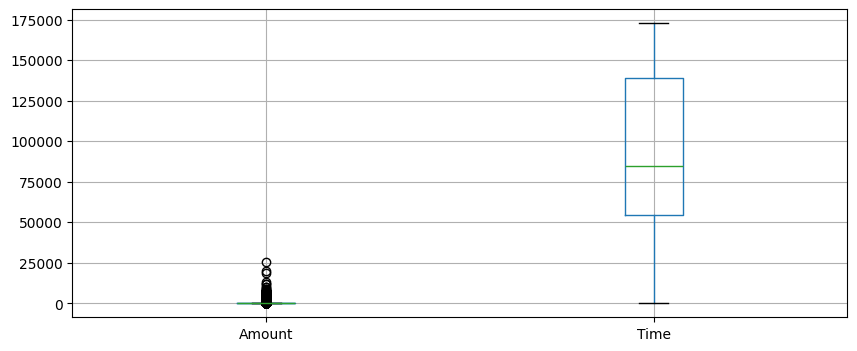

In [18]:
data[["Amount", "Time"]].boxplot(figsize=(10, 4))

Amount: 
- La mayoría de los valores están cerca del cero.
- Hay muchos outliers: transacciones con montos muy altos, por encima de los 10,000 hasta más de 25,000.

Time:
- La distribución es más uniforme.
- No hay valores extremos aparentes (los bigotes del boxplot cubren todo el rango).
- La mediana está cerca del centro del rango, lo que indica que las transacciones están distribuidas a lo largo del tiempo.

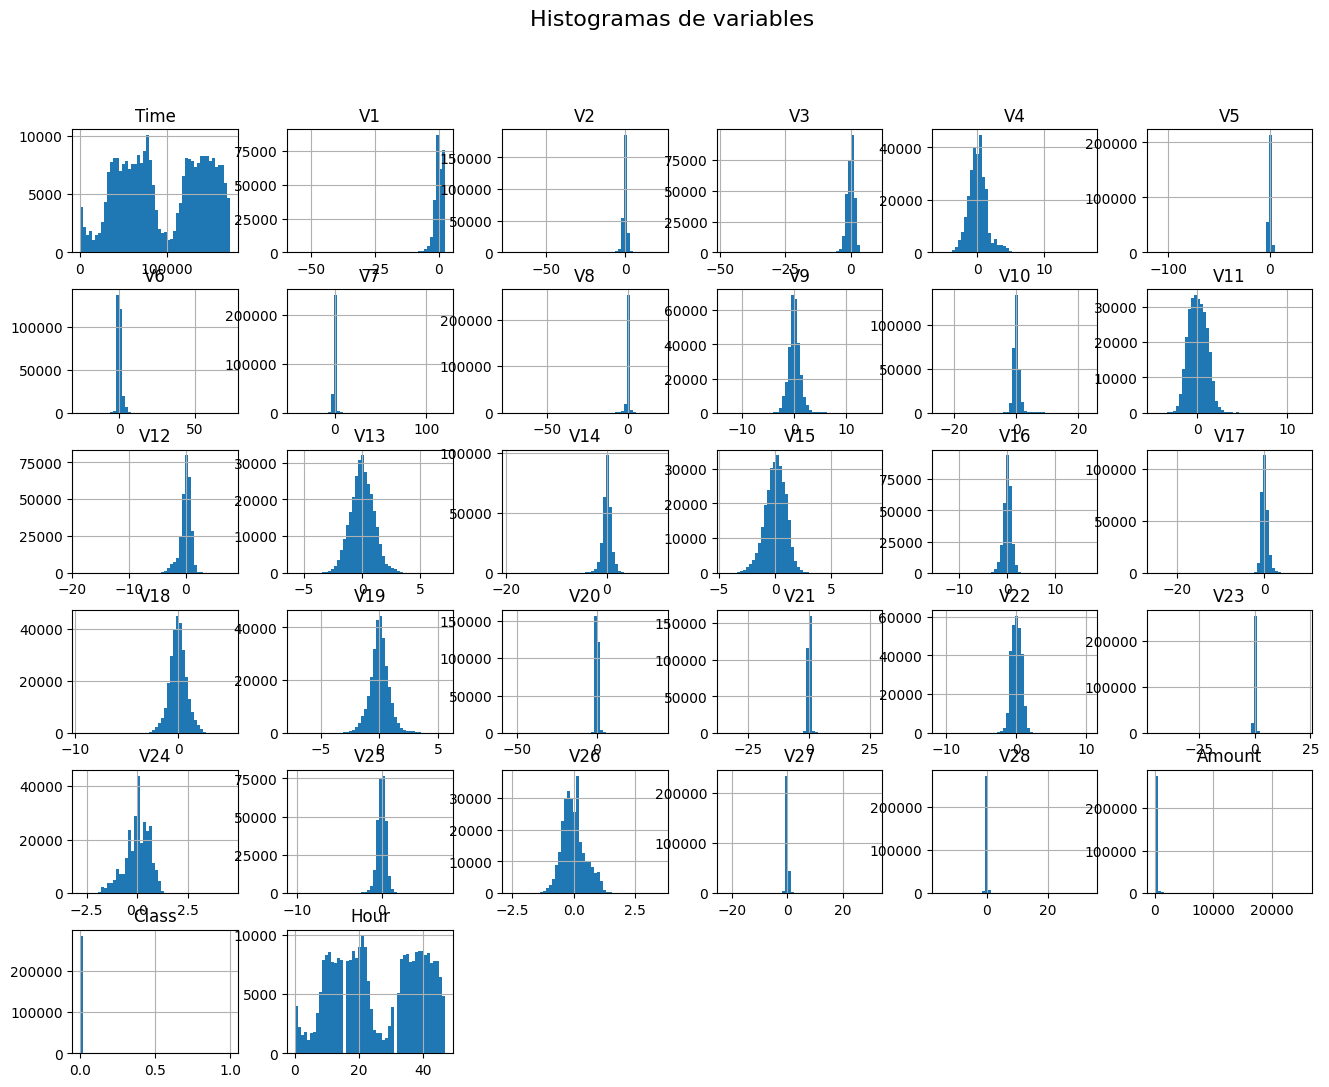

In [20]:
data.hist(figsize=(16, 12), bins=50)
plt.suptitle("Histogramas de variables", fontsize=16)
plt.show()

Amount:
- Aunque la mayoría de las transacciones tienen montos pequeños, existen algunas transacciones con montos extremadamente altos, aunque son muy poco frecuentes. Estos valores aparecen como outliers en el boxplot, pero apenas son visibles en el histograma debido a su baja frecuencia.

V1 a V28:
- La mayoría tiene distribución centrada en 0, similar a una distribución normal o gaussiana.

### **Visualizacion de los atributos de clase reales y fraudulentos**

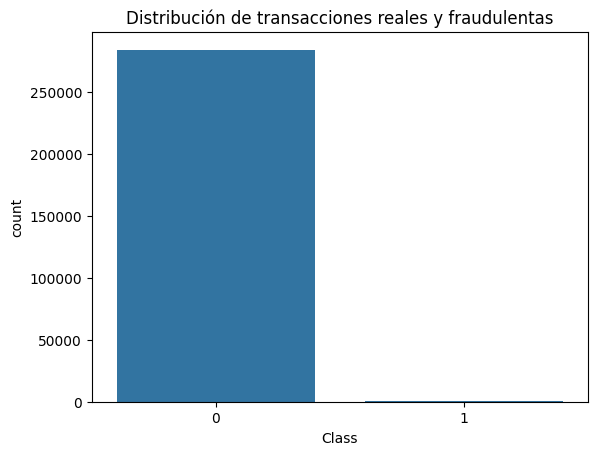

In [21]:
sns.countplot(x="Class", data=data)
plt.title("Distribución de transacciones reales y fraudulentas")
plt.show()

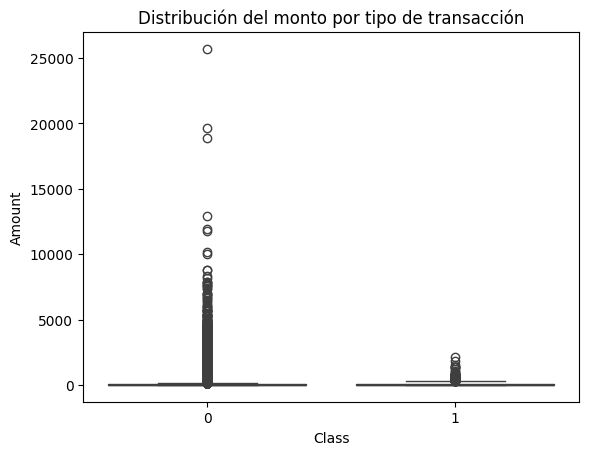

In [22]:
sns.boxplot(x="Class", y="Amount", data=data)
plt.title("Distribución del monto por tipo de transacción")
plt.show()

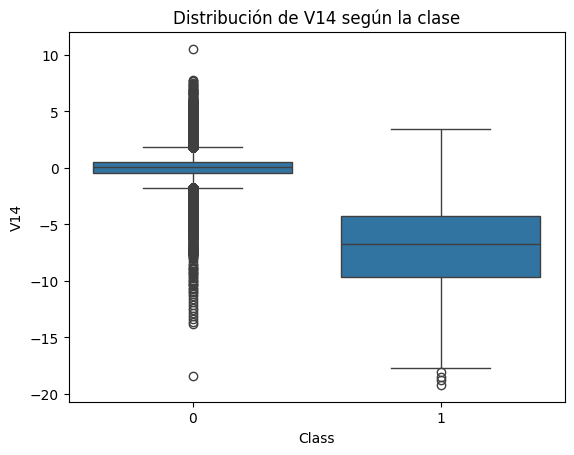

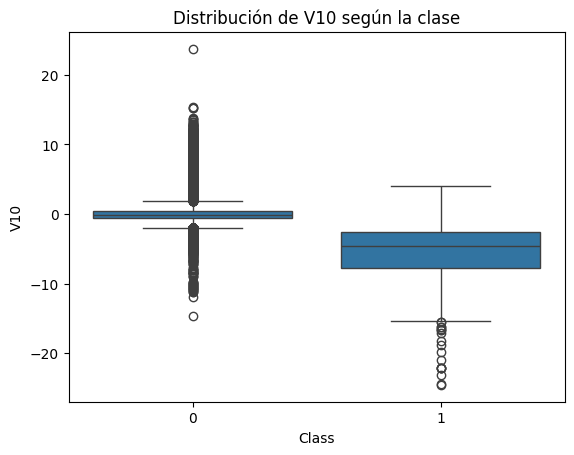

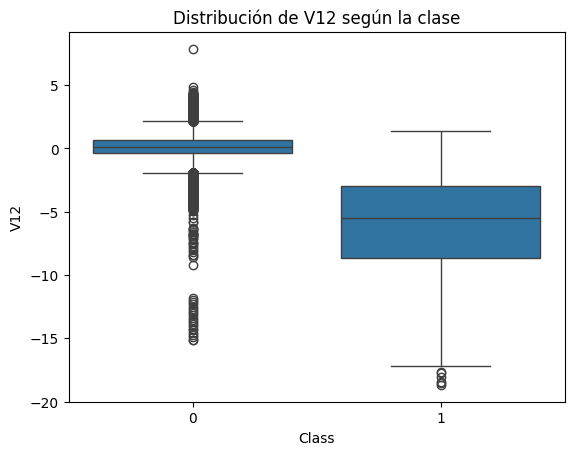

In [23]:
for col in ["V14", "V10", "V12"]:
    sns.boxplot(x="Class", y=col, data=data)
    plt.title(f"Distribución de {col} según la clase")
    plt.show()

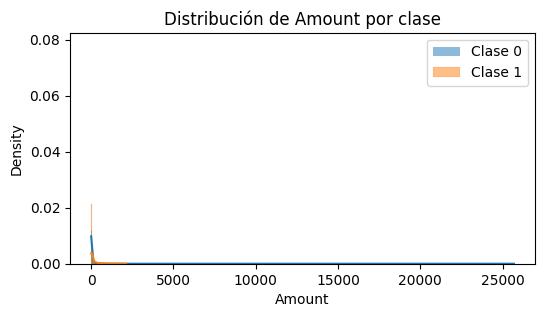

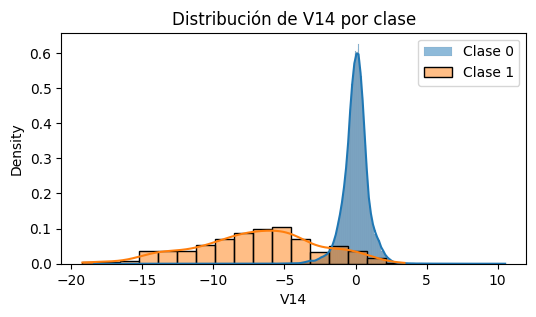

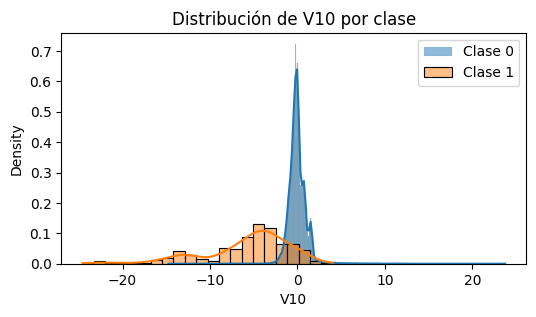

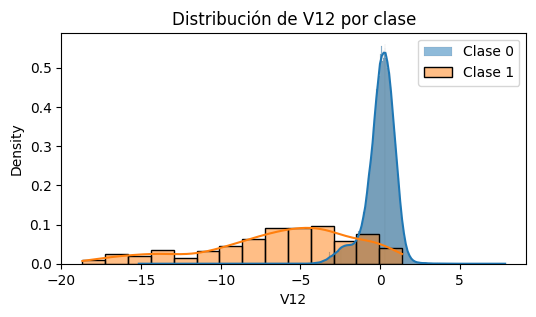

In [24]:
for col in ["Amount", "V14", "V10", "V12"]:
    plt.figure(figsize=(6, 3))
    for c in [0, 1]:
        sns.histplot(data[data["Class"] == c][col], label=f'Clase {c}', kde=True, stat="density", common_norm=False)
    plt.title(f'Distribución de {col} por clase')
    plt.legend()
    plt.show()

C:\Users\Proyectos\AppData\Local\Temp\ipykernel_23952\3782314423.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Hour", data=data, palette="viridis")


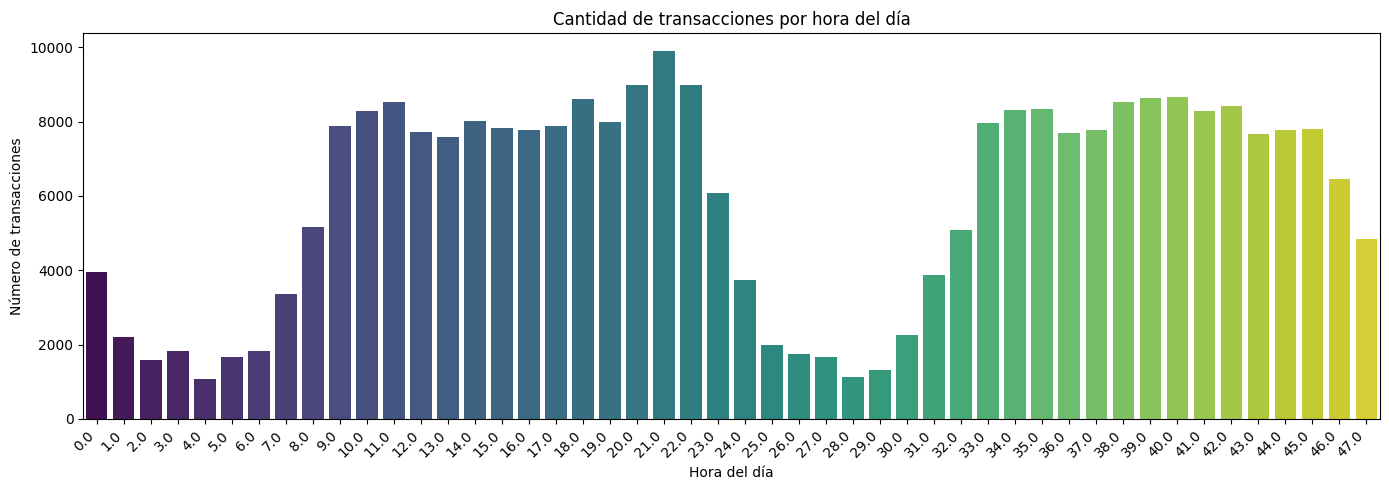

In [26]:
#Visualizar las transacciones por hora del dia
plt.figure(figsize=(14, 5))  # más ancho
sns.countplot(x="Hour", data=data, palette="viridis")
plt.title("Cantidad de transacciones por hora del día")
plt.xlabel("Hora del día")
plt.ylabel("Número de transacciones")
plt.xticks(rotation=45, ha='right')  # rotación y alineación
plt.tight_layout()
plt.show()

Se observan dos grupos claros de actividad:

Uno entre las horas 8 y 24 (día 1).

Otro entre las horas 32 y 47 (día 2).

Los picos más altos de transacciones están entre las horas 21 y 22, y nuevamente entre 39 y 40.

Entre las horas 0 y 6 (y también 24 a 30), el número de transacciones cae notablemente.



## <font color=blue>2. Preprocesamiento de los datos</font>

### **Verificar datos faltantes y/o duplicados**

In [27]:
print("Valores nulos por columna:\n", data.isnull().sum())

Valores nulos por columna:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
Hour      0
dtype: int64


In [28]:
duplicados = data.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

Cantidad de registros duplicados: 1081


In [29]:
data = data.drop_duplicates()

In [30]:
duplicados = data.duplicated().sum()
print(f"Cantidad de registros duplicados: {duplicados}")

Cantidad de registros duplicados: 0


### **Separar variables predictoras y el atributo destino de los datos**

In [ ]:
# Eliminar columnas que no se usarán como predictores (opcional: "Time")
X = data.drop(columns=["Class", "Hour"])  # Puedes quedarte con "Hour" si lo prefieres
y = data["Class"]

### **Seleccionar las 10 mejores características para construir modelos**

Utilizar:

from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif

## Visualización de las mejores y malas características

## <font color=blue>3. Entrenando el modelo </font>

### **Dividir el conjunto de datos en una proporción de 80: 20**

### Validación cruzada de los datos de entrenamiento

Debido a que los datos están muy desequilibrados, utilizaremos validación cruzada.
* Dividir el conjunto de datos en conjuntos de datos de entrenamiento y prueba.
* Entrene el modelo usando un conjunto de datos de entrenamiento.
* Pruebe el modelo en el conjunto de datos de prueba.

In [ ]:
# Crear un objeto Gaussiano Naive Bayes

# cv_results almacena la puntuación del tren y el estimador


In [ ]:
# Se selecciona la iteración con train_score máximo para el modelo de entrenamiento.


## <font color=blue>4. Evaluación y visualización del modelo </font>
<br>

## **Precision de los datos de entrenamiento**

## **Precision de los datos de prueba**